## **Import Libraries**

In [ ]:
#library
!pip install bioinfokit
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=b58e81085c44cf4b1ed87774bf4a5d220ff82a0a579a36bfa8116db31d6e2f4e
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
Successfully built bioinfokit


**Clean data for Research Question 1**

In [ ]:
#clean the dataset
#interest1: factors-Sex&Juvenile Crime Response variable-the number of search reason
#remove additional columns except Sex/Youth_at_arrest__under_18_years/SearchReason_CauseInjury/SearchReason_AssistEscape/SearchReason_PossessWeapons/SearchReason_PossessEvidence
# index 6,8,19,20,21,22, keep
# y:the number of search reason = sum the reasons
#combine youth(younger)and youth(under)
#delete the missing value
#import excel
data1 = {"Sex":[],"Youth_at_arrest__under_18_years":[],"Num_of_Search_Reason":[]}

# Open the CSV file for reading
with open('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv', newline='') as csvfile:
    # Use the csv module to read the file
    reader = csv.reader(csvfile)
    next(reader)
    # Loop through each row in the file
    for row in reader:
      # Do something with the row data
      if(row[6])!= "U":
        try:
          data1["Num_of_Search_Reason"].append(int(row[19])+int(row[20])+int(row[21])+int(row[22]))
          data1["Sex"].append(row[6])
          if row[8] != "Not a youth":
            data1["Youth_at_arrest__under_18_years"].append("Youth") 
          else:
            data1["Youth_at_arrest__under_18_years"].append("Not a Youth")
        except:
          pass
#create data
dataframe_1 = pd.DataFrame(data1)
dataframe_1

,Sex,Youth_at_arrest__under_18_years,Num_of_Search_Reason
0,M,Not a Youth,3
1,M,Not a Youth,3
2,M,Not a Youth,1
3,M,Not a Youth,2
4,M,Not a Youth,2
...,...,...,...
7796,M,Not a Youth,2
7797,M,Not a Youth,0
7798,M,Not a Youth,1
7799,M,Youth,2


**EDA for Research Question 1**

In [ ]:
#Show Basic information about the cleaned dataset
dataframe_1.info()
#Describe the data in the cleaned dataset
dataframe_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sex                              7801 non-null   object
 1   Youth_at_arrest__under_18_years  7801 non-null   object
 2   Num_of_Search_Reason             7801 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 183.0+ KB


,Num_of_Search_Reason
count,7801.000000
mean,1.981156
std,1.209695
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

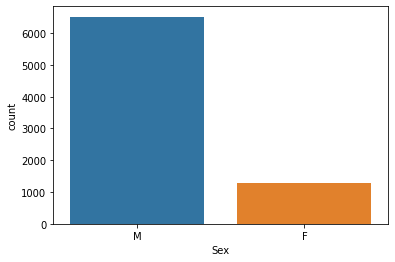

In [ ]:
#Show the count chart for sex 
sns.countplot(dataframe_1['Sex'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Youth_at_arrest__under_18_years', ylabel='count'>

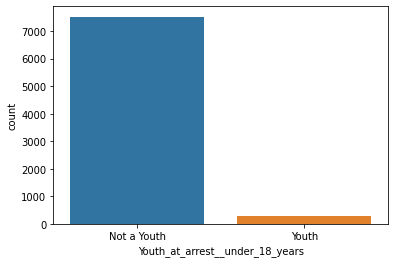

In [ ]:
#Show the bar chart for Youth_at_arrest__under_18_years
sns.countplot(dataframe_1['Youth_at_arrest__under_18_years'])


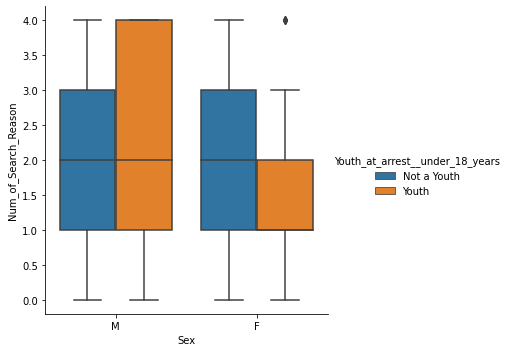

In [ ]:
#Side-by-side boxplots using Sex in X axis, num_of_Search_Reason as Y axis, and use color to represent whether the person is youth
sns.catplot(data=dataframe_1, kind="box", x="Sex", y="Num_of_Search_Reason", hue="Youth_at_arrest__under_18_years")


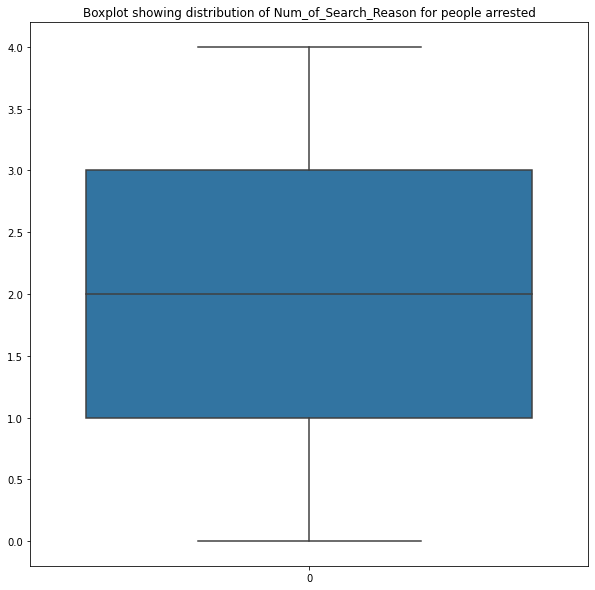

In [ ]:
#Boxplot for Num_of_Search_Reason
plt.figure(figsize= (10,10))
sns.boxplot(data = dataframe_1['Num_of_Search_Reason'])
plt.title('Boxplot showing distribution of Num_of_Search_Reason for people arrested')
plt.xlabel('')
plt.ylabel('')
plt.show()

**T-Test for dataset for Research Question 1**

In [ ]:
#T test for dataframe_1
def wel_dof(x,y):
  dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
  return dof

In [ ]:
#Get the unique values in the column "Sex"
dataframe_1["Sex"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
# Set T test to get Pvalue

F = dataframe_1[dataframe_1['Sex']=='F']
M = dataframe_1[dataframe_1['Sex']=='M']

F_reason = F['Num_of_Search_Reason']
M_reason = M['Num_of_Search_Reason']
print('Ttest results: ',stats.ttest_ind(F_reason, M_reason, equal_var=False)) #p value is significant


Ttest results:  Ttest_indResult(statistic=-3.9206576699164004, pvalue=9.150787627848595e-05)


In [ ]:
#Get the means and standard deviations for the two groups
print('Mean for number of search reasons, male and female:',M_reason.mean(), F_reason.mean())
print('Standard deviation for search reasons, male and female:',M_reason.std(), F_reason.std())
     

Mean for number of search reasons, male and female: 2.004449217551396 1.86282151208106
Standard deviation for search reasons, male and female: 1.2148934457394573 1.176292261182499


In [ ]:
#Get confidence interval for num of search reason
import statsmodels.stats.api as sms
x = sms.CompareMeans(sms.DescrStatsW(M_reason), sms.DescrStatsW(F_reason))
print('Confidence interval for num of search reason:',x.tconfint_diff(usevar='unequal'))

Confidence interval for num of search reason: (0.0707809490366447, 0.2124744619040275)


In [ ]:
#welch dof 
print('DOF for num of search reason:', wel_dof(M_reason, F_reason))

DOF for period 3: 1860.7467668605038


In [ ]:
#Get the unique values in the column 'Youth_at_arrest__under_18_years'
dataframe_1["Youth_at_arrest__under_18_years"].unique()

array(['Not a Youth', 'Youth'], dtype=object)

In [ ]:
#Set T test to get Pvalue
Y = dataframe_1[dataframe_1['Youth_at_arrest__under_18_years']=='Youth']
N = dataframe_1[dataframe_1['Youth_at_arrest__under_18_years']=='Not a Youth']

Y_reason = Y['Num_of_Search_Reason']
N_reason = N['Num_of_Search_Reason'] 
print('Ttest results: ',stats.ttest_ind(Y_reason, N_reason, equal_var=False)) #p value is significant

Ttest results:  Ttest_indResult(statistic=4.818484486958009, pvalue=2.302657291812624e-06)


In [ ]:
#Get the means and standard deviations for each group
print('Mean for number of search reasons, Youth and Not a Youth:',Y_reason.mean(), N_reason.mean())
print('Standard deviation for search reasons, male and female:',Y_reason.std(), N_reason.std())

Mean for number of search reasons, Youth and Not a Youth: 2.3285714285714287 1.968222310862917
Standard deviation for search reasons, male and female: 1.2295224887879148 1.2071046956730758


In [ ]:
#Get the confidence interval for num of search reason
import statsmodels.stats.api as sms
y = sms.CompareMeans(sms.DescrStatsW(Y_reason), sms.DescrStatsW(N_reason))
print('Confidence interval for num of search reason:',y.tconfint_diff(usevar='unequal'))

Confidence interval for num of search reason: (0.21317874124968636, 0.5075194941673369)


**Clean Data for Research Question 2**

In [ ]:
#clean the dataset
#interest2: factors-Sex&Perceived_Race Response variable-Lower limit of age at arrest
#remove additional column except Perceived_Race/Sex/Age_group__at_arrest_
#index 5,6,7 keep
#y:lower limit of age at arrest = choose the limit age of the Age_group__at_arrest_
#delete missing value
#import excel
data2 = {"Sex":[],"Race":[],"Lower_bound_interval_arrest_age":[]}

# Open the CSV file for reading
with open('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv', newline='') as csvfile:
    # Use the csv module to read the file
    reader = csv.reader(csvfile)
    next(reader)
    # Loop through each row in the file
    for row in reader:
      # Do something with the row data
      if(row[6]!= "U" and row[5] != "Unknown or Legacy" and row[5]!="" and row[7] != ""):
        try:
          data2["Race"].append(row[5])
          data2["Sex"].append(row[6])
          data2["Lower_bound_interval_arrest_age"].append(int(row[7][5:7]))
        except:
          pass
#create data
dataframe_2 = pd.DataFrame(data2)
dataframe_2



,Sex,Race,Lower_bound_interval_arrest_age
0,M,White,35
1,M,White,35
2,M,Black,25
3,M,South Asian,25
4,M,South Asian,25
...,...,...,...
60182,F,White,25
60183,F,Indigenous,25
60184,M,South Asian,35
60185,F,White,45


**EDA for the data for Research Question 2**

In [ ]:
#Show Basic information about the cleaned dataset
dataframe_2.info()
#Describe the data in the cleaned dataset
dataframe_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60187 entries, 0 to 60186
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sex                              60187 non-null  object
 1   Race                             60187 non-null  object
 2   Lower_bound_interval_arrest_age  60187 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


,Lower_bound_interval_arrest_age
count,60187.000000
mean,31.757755
std,11.874668
min,17.000000
25%,25.000000
50%,25.000000
75%,35.000000
max,65.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

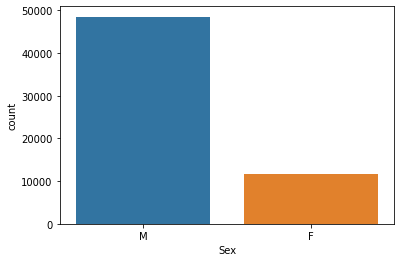

In [ ]:
#Show the bar chart for gender 
sns.countplot(dataframe_2['Sex'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

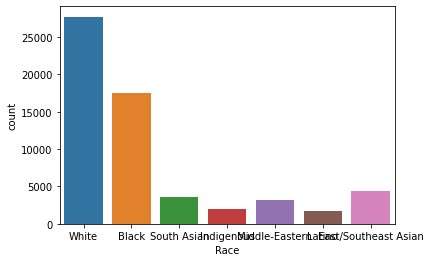

In [ ]:
#Show the bar chart for race
sns.countplot(dataframe_2['Race'])


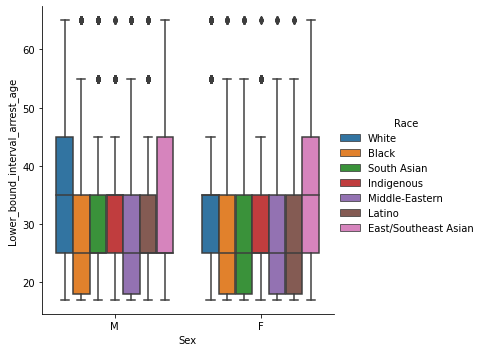

In [ ]:
#Show side-by-side boxplots using sex as X axis and lower bound interval arrest age as Y axis, and use color to represent different races
sns.catplot(data=dataframe_2, kind="box", x="Sex", y="Lower_bound_interval_arrest_age", hue="Race")


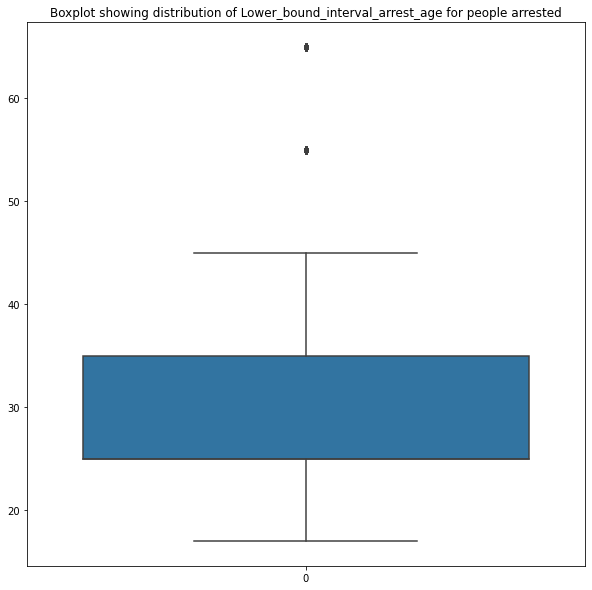

In [ ]:
#Boxplot for Lower_bound_interval_arrest_age
plt.figure(figsize= (10,10))
sns.boxplot(data = dataframe_2['Lower_bound_interval_arrest_age'])
plt.title('Boxplot showing distribution of Lower_bound_interval_arrest_age for people arrested')
plt.xlabel('')
plt.ylabel('')
plt.show()

**T-Test for the data **

In [ ]:
#Get the unique values in the column "Sex"
dataframe_2["Sex"].unique()

array(['M', 'F'], dtype=object)

In [ ]:

# Set T test to get Pvalue

F = dataframe_2[dataframe_2['Sex']=='F']
M = dataframe_2[dataframe_2['Sex']=='M']

F_age = F['Lower_bound_interval_arrest_age']
M_age = M['Lower_bound_interval_arrest_age']
print('Ttest results for num of search reasons:',stats.ttest_ind(F_age, M_age, equal_var=False)) #p value is significant




Ttest results for num of search reasons: Ttest_indResult(statistic=-11.304072125494523, pvalue=1.5685980630153008e-29)


In [ ]:
#Get the means and standard deviatios of the two groups
print('Mean for lower bound arrest age, male and female:',M_age.mean(), F_age.mean())
print('Standard deviation for search reasons, male and female:',M_age.std(), F_age.std())

Mean for lower bound arrest age, male and female: 32.018616637460056 30.67462763225475
Standard deviation for search reasons, male and female: 11.964638257680464 11.430566154779902


In [ ]:
#Get confidence interval for age
import statsmodels.stats.api as sms
z = sms.CompareMeans(sms.DescrStatsW(M_age), sms.DescrStatsW(F_age))
print('Confidence interval for lower bound arrest age:',z.tconfint_diff(usevar='unequal'))

Confidence interval for lower bound arrest age: (1.1109452165519638, 1.5770327938586466)


**Two-Way ANOVA & Post-hoc Test**

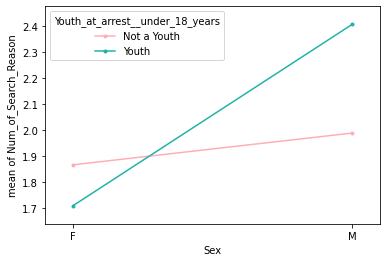

In [ ]:
#interaction plot for Interest1:
fig = interaction_plot(x=dataframe_1['Sex'], trace=dataframe_1['Youth_at_arrest__under_18_years'], response=dataframe_1['Num_of_Search_Reason'], 
    colors=['#FFAEB9','#20B2AA'])
plt.show()

In [ ]:
# hypothesis test for Interest 1
# interaction model
res1 = stat()
res1.anova_stat(df=dataframe_1, res_var='Num_of_Search_Reason', anova_model='Num_of_Search_Reason~C(Sex)+C(Youth_at_arrest__under_18_years)+C(Sex):C(Youth_at_arrest__under_18_years)')
res1.anova_summary
# post-hoc test
#tukey HSD


,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),1.0,20.009295,20.009295,13.745209,0.000211
C(Youth_at_arrest__under_18_years),1.0,33.560293,33.560293,23.053947,0.000002
C(Sex):C(Youth_at_arrest__under_18_years),1.0,8.850526,8.850526,6.079791,0.013695
Residual,7797.0,11350.316740,1.455729,NaN,NaN


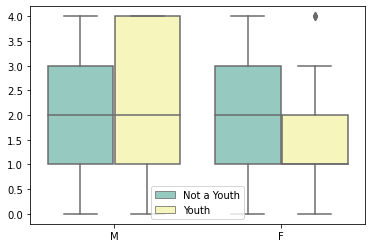

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


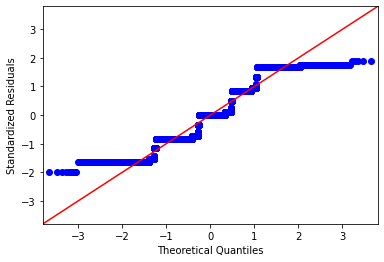

In [ ]:
#Model Diagnostics Analysis for Interest1:
#create a boxplot
sns.boxplot(x="Sex", y="Num_of_Search_Reason", hue="Youth_at_arrest__under_18_years", data=data1, palette="Set3") 
plt.show()
#creat a Normal Q-Q plot
#note that  In a one-way ANOVA, 
#the QQ plot is used to check if the data follow a normal distribution within each group.
#In a two-way ANOVA, the QQ plot is used to check if the residuals of the model 
#(i.e., the differences between the observed values and the predicted values) follow a normal distribution
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")

plt.show()


In [ ]:
#Post-hoc test for Interest 1
# for interaction effect between Sex and Type of Age
res1.tukey_hsd(df=dataframe_1, res_var='Num_of_Search_Reason', xfac_var=['Sex','Youth_at_arrest__under_18_years'], anova_model='Num_of_Search_Reason ~ C(Sex) + C(Youth_at_arrest__under_18_years) + C(Sex):C(Youth_at_arrest__under_18_years)')
res1.tukey_summary.head(10)


/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(M, Not a Youth)","(M, Youth)",0.417108,0.216771,0.617444,7.565968,0.001000
1,"(M, Not a Youth)","(F, Not a Youth)",0.121901,0.025931,0.217872,4.615804,0.006077
2,"(M, Not a Youth)","(F, Youth)",0.278837,-0.279365,0.837040,1.815247,0.564703
3,"(M, Youth)","(F, Not a Youth)",0.539009,0.323885,0.754134,9.105050,0.001000
4,"(M, Youth)","(F, Youth)",0.695945,0.105472,1.286418,4.283031,0.013166
5,"(F, Not a Youth)","(F, Youth)",0.156936,-0.406743,0.720615,1.011736,0.883598


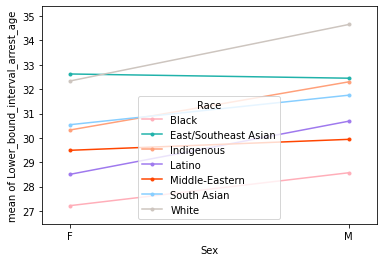

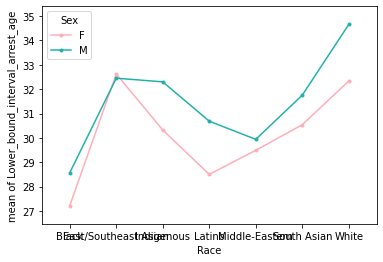

In [ ]:
#interaction plot for Interest2:
fig2 = interaction_plot(x=dataframe_2['Sex'], trace=dataframe_2['Race'], response=dataframe_2['Lower_bound_interval_arrest_age'], 
    colors=['#FFAEB9','#20B2AA','#FFA07A','#9F79EE','#FF4500','#87CEFF','#CDC5BF'])
plt.show()
fig3 = interaction_plot(x=dataframe_2['Race'], trace=dataframe_2['Sex'], response=dataframe_2['Lower_bound_interval_arrest_age'], 
    colors=['#FFAEB9','#20B2AA'])
plt.show()

In [ ]:
# hypothesis test for Interest 2
# interaction model
res2 = stat()
res2.anova_stat(df=dataframe_2, res_var='Lower_bound_interval_arrest_age', anova_model='Lower_bound_interval_arrest_age~C(Sex)+C(Race)+C(Sex):C(Race)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),1.0,2.884891e+04,28848.913536,215.015943,1.341475e-48
C(Race),6.0,3.912263e+05,65204.386386,485.979571,0.000000e+00
C(Sex):C(Race),6.0,4.985908e+03,830.984597,6.193472,1.645770e-06
Residual,60173.0,8.073474e+06,134.171044,NaN,NaN


In [ ]:
#Post-hoc test for Interest 2
# for interaction effect between Sex and Race
res2.tukey_hsd(df=dataframe_2, res_var='Lower_bound_interval_arrest_age', xfac_var=['Sex','Race'], anova_model='Lower_bound_interval_arrest_age ~ C(Sex) + C(Race) + C(Sex):C(Race)')
res2.tukey_summary.head(1000)



/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(M, White)","(M, Black)",6.086842,5.669627,6.504056,69.198540,0.001000
1,"(M, White)","(M, South Asian)",2.902552,2.156717,3.648387,18.458708,0.001000
2,"(M, White)","(M, Indigenous)",2.355005,1.246707,3.463303,10.078581,0.001000
3,"(M, White)","(M, Middle-Eastern)",4.715512,3.943913,5.487110,28.986890,0.001000
4,"(M, White)","(M, Latino)",3.970092,2.933658,5.006526,18.168662,0.001000
...,...,...,...,...,...,...,...
86,"(F, Indigenous)","(F, Latino)",1.820536,-1.028362,4.669435,3.031004,0.647135
87,"(F, Indigenous)","(F, East/Southeast Asian)",2.301179,0.197553,4.404805,5.188551,0.017367
88,"(F, Middle-Eastern)","(F, Latino)",0.987970,-2.152580,4.128520,1.492115,0.900000
89,"(F, Middle-Eastern)","(F, East/Southeast Asian)",3.133745,0.649380,5.618111,5.982908,0.001900
